
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       141
           1       1.00      0.44      0.62         9

    accuracy                           0.97       150
   macro avg       0.98      0.72      0.80       150
weighted avg       0.97      0.97      0.96       150

Accuracy: 0.9666666666666667

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.88      0.78      0.82         9

    accuracy                           0.98       150
   macro avg       0.93      0.89      0.91       150
weighted avg       0.98      0.98      0.98       150

Accuracy: 0.98


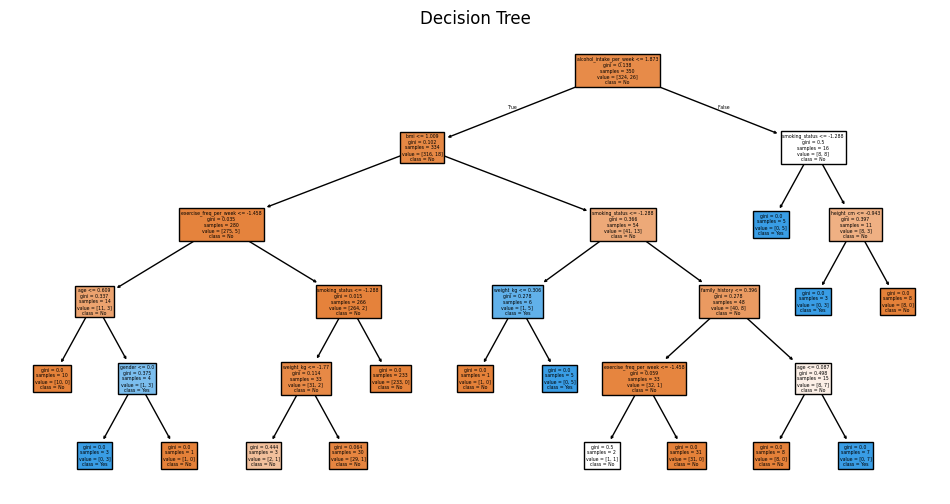


DBSCAN found 12 clusters (including noise if -1 is present).
DBSCAN Silhouette Score: -0.15855642018052304


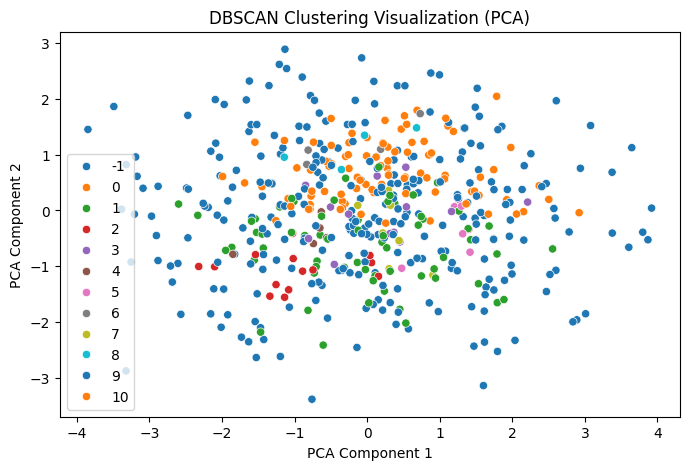


K-Means Clustering
Silhouette Score: 0.11588461427498856


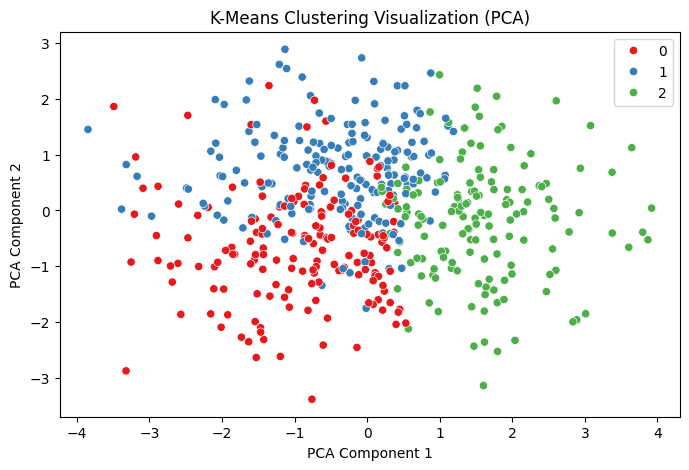

In [16]:
# Week 4 - Data Mining
# Techniques: Logistic Regression, Decision Tree, K-Means Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("C:/Users/ADMIN/Desktop/week4_data_mining/synthetic_health_data.csv")

# Encode categorical columns
label_encoders = {}
for col in ['gender', 'smoking_status', 'family_history']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop("chronic_illness", axis=1)
y = df["chronic_illness"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1.  CLASSIFICATION

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# I) Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# II) Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()

# 2. Clustering 
 
# I) K-Means

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans_labels

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Add to dataframe
df['dbscan_cluster'] = db_labels

# Evaluate DBSCAN clustering
unique_labels = np.unique(db_labels)
print(f"\nDBSCAN found {len(unique_labels)} clusters (including noise if -1 is present).")
sil_score_db = silhouette_score(X_scaled, db_labels)
print("DBSCAN Silhouette Score:", sil_score_db)

# Plot DBSCAN clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette="tab10")
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Evaluate clustering
sil_score = silhouette_score(X_scaled, kmeans_labels)
print("\nK-Means Clustering")
print("Silhouette Score:", sil_score)

# Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set1")
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Saving Clustered Data 


df.to_csv("clustered_health_data.csv", index=False)


